Nelygine lygciu sistema:
Z1(x1,x2) = x1^2 / ((x2 + cos(x1))^2 + 1) - 2 = 0
Z2(x1,x2) = (x1^2)/9 + (x2 + cos(x1))^2 - 5 = 0



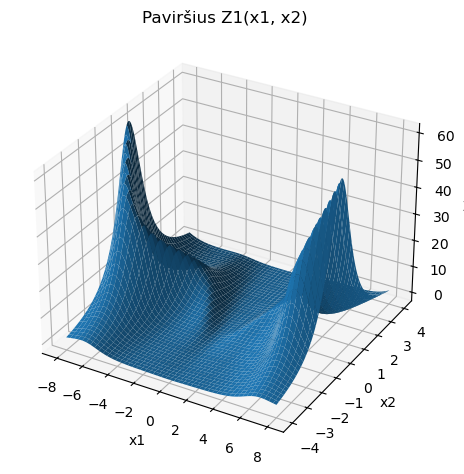

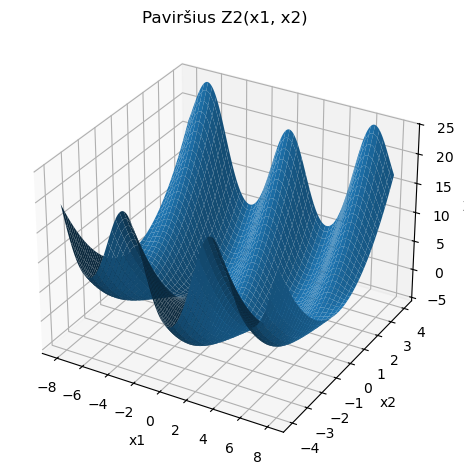

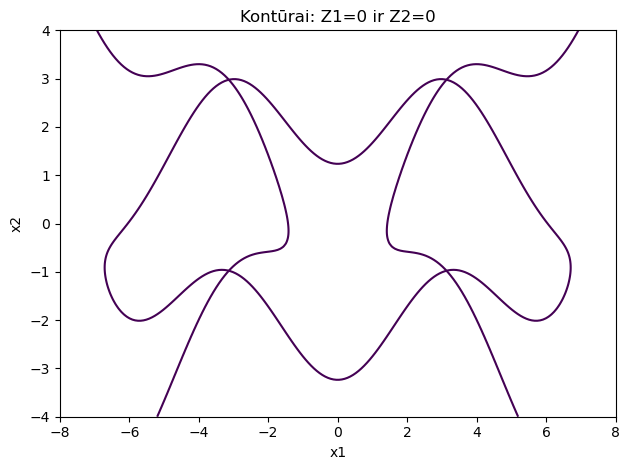

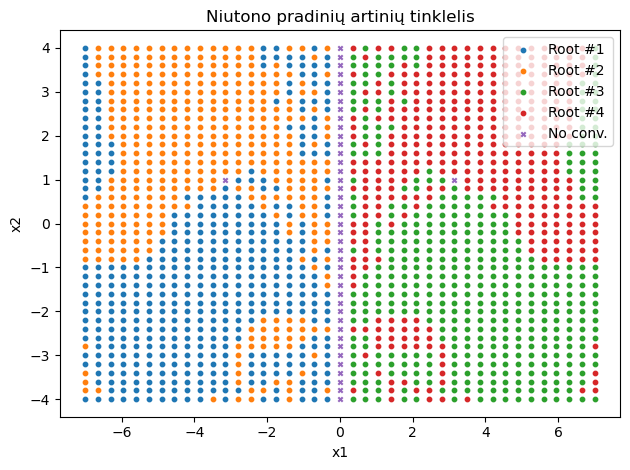

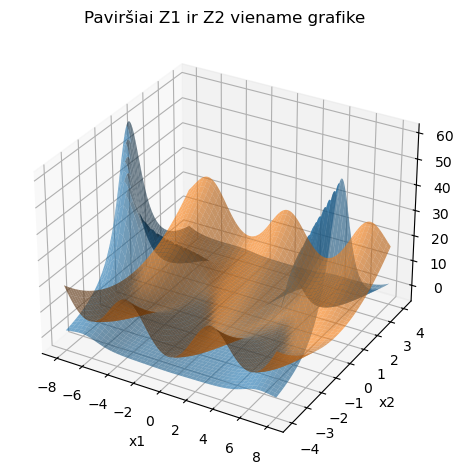

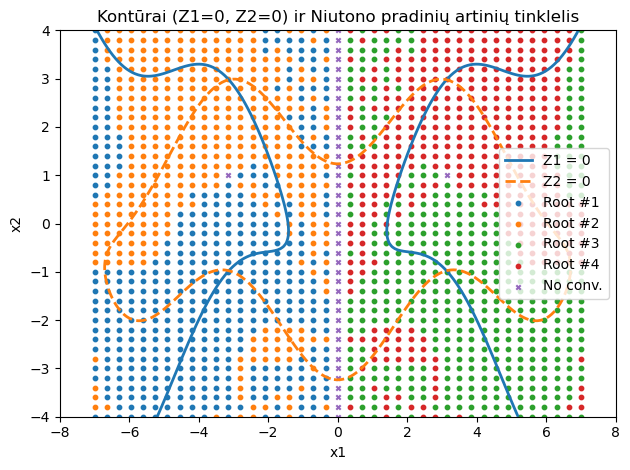

Rasta sprendinių: 4


Skirtingi sprendiniai ir bent po vieną pradinį artinį:

 Root #        x1        x2    ‖F(x)‖   Seed x1   Seed x2  Basin size
      1 -3.133398 -0.977176  0.000000 -7.000000 -4.000000         437
      2 -3.133398  2.977109  0.000000 -7.000000 -3.800000         382
      3  3.133398 -0.977176  0.000000  0.350000 -4.000000         436
      4  3.133398  2.977109  0.000000  0.350000 -3.800000         383

Sprendiniai (fsolve):

 Root #        x1        x2
      1  3.133398  2.977109
      2 -3.133398  2.977109
      3 -3.133398 -0.977176
      4  3.133398 -0.977176


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, Tuple
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from collections import defaultdict
from scipy.optimize import fsolve

def Z1_scalar(x1: float, x2: float) -> float:
    #Pirmoji funkcija Z1(x1, x2)
    return (x1**2) / ((x2 + np.cos(x1))**2 + 1.0) - 2.0

def Z2_scalar(x1: float, x2: float) -> float:
    #Antroji funkcija Z2(x1, x2)
    return (x1**2) / 9.0 + (x2 + np.cos(x1))**2 - 5.0

def F(x: np.ndarray) -> np.ndarray:
    #Vektorinė funkcija F(x) = [Z1(x); Z2(x)]
    x1, x2 = x[0], x[1]
    return np.array([Z1_scalar(x1, x2), Z2_scalar(x1, x2)], dtype=float)

def J(x: np.ndarray) -> np.ndarray:
    #Jakobiano matrica J(x) = [[dZ1/dx1, dZ1/dx2], [dZ2/dx1, dZ2/dx2]]
    x1, x2 = x[0], x[1]

    #Bendra daliklio dalis iš Z1 formulės
    denom = (x2 + np.cos(x1))**2 + 1.0
    #Išvestinės Z1 atžvilgiu x1 ir x2
    dZ1_dx1 = (2.0 * x1) / denom + (x1**2) * (2.0 * (x2 + np.cos(x1)) * np.sin(x1)) / (denom**2)
    dZ1_dx2 = -(x1**2) * (2.0 * (x2 + np.cos(x1))) / (denom**2)
    
    #Išvestinės Z2 atžvilgiu x1 ir x2
    dZ2_dx1 = (2.0 * x1) / 9.0 - 2.0 * (x2 + np.cos(x1)) * np.sin(x1)
    dZ2_dx2 = 2.0 * (x2 + np.cos(x1))

    #Suformuojame 2x2 Jakobiano matricą
    return np.array([[dZ1_dx1, dZ1_dx2],
                     [dZ2_dx1, dZ2_dx2]], dtype=float)

def newton2(Ffun: Callable[[np.ndarray], np.ndarray],
            Jfun: Callable[[np.ndarray], np.ndarray],
            x0: np.ndarray,
            tol: float = 1e-9,
            max_iter: int = 60) -> Tuple[np.ndarray, bool, int]:

    #Niutono metodas 2D sistemai: iteratyviai ieško F(x)=0 sprendinio
    x = np.array(x0, dtype=float).copy()
    
    for k in range(1, max_iter + 1):
        #Apskaičiuojame F(x)
        f = Ffun(x)
        
        try:
            #Sprendžiame J(x) * step = F(x)
            step = np.linalg.solve(Jfun(x), f)
        except np.linalg.LinAlgError:
            #Jei Jakobianas singuliarus - blogai
            return x, False, k
            
        #Niutono atnaujinimas: x_{k+1} = x_k - step
        x_new = x - step
        
        #Sustabdymo kriterijai
        if np.linalg.norm(step, 2) < tol and np.linalg.norm(f, 2) < tol:
            return x_new, True, k
            
        #Tęsiame nuo naujos reikšmės
        x = x_new
        
    #Jei nepasiekta konvergencija per max_iter — grąžiname paskutinį x
    return x, False, max_iter

if __name__ == "__main__":
    print("Nelygine lygciu sistema:")
    print("Z1(x1,x2) = x1^2 / ((x2 + cos(x1))^2 + 1) - 2 = 0")
    print("Z2(x1,x2) = (x1^2)/9 + (x2 + cos(x1))^2 - 5 = 0\n")
    
    #Tinklelio ribos ir tankis paviršiams/kontūrams
    x1min, x1max = -8.0, 8.0
    x2min, x2max = -4.0, 4.0
    X1 = np.linspace(x1min, x1max, 200)
    X2 = np.linspace(x2min, x2max, 200)
    XX1, XX2 = np.meshgrid(X1, X2)

    #3D grafikas: Z1 paviršius
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.set_title("Paviršius Z1(x1, x2)")
    ax1.plot_surface(XX1, XX2, Z1_scalar(XX1, XX2), linewidth=0, antialiased=True)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("Z1")
    plt.tight_layout()
    plt.show()

    #3D grafikas: Z2 paviršius
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.set_title("Paviršius Z2(x1, x2)")
    ax2.plot_surface(XX1, XX2, Z2_scalar(XX1, XX2), linewidth=0, antialiased=True)
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_zlabel("Z2")
    plt.tight_layout()
    plt.show()

    #2D kontūrai: Z1=0 ir Z2=0 (sprendinių kreivės plokštumoje)
    plt.figure()
    plt.title("Kontūrai: Z1=0 ir Z2=0")
    plt.contour(XX1, XX2, Z1_scalar(XX1, XX2), levels=[0.0])
    plt.contour(XX1, XX2, Z2_scalar(XX1, XX2), levels=[0.0])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    plt.show()

    #Pradinių artinių tinklelis Niutono metodui (x1 ir x2 ašių diskretizacija)
    gX1 = np.linspace(-7.0, 7.0, 41)
    gX2 = np.linspace(-4.0, 4.0, 41)

    #Rastos šaknys (unikalūs sprendiniai) ir priskyrimai tinklelio taškams
    roots: list[np.ndarray] = []
    owners: dict[tuple[float, float], int] = {}

    #Einame per visus pradinius taškus (a,b) ir paleidžiame Niutono metodą
    for a in gX1:
        for b in gX2:
            x, ok, _ = newton2(F, J, np.array([a, b]))
            
            if ok and np.linalg.norm(F(x)) < 1e-9:
                #Jei konvergavo ir F(x) mažas — tikriname, ar tai nauja šaknis
                idx = None
                
                for j, r in enumerate(roots):
                    #Jei rasta šaknis arti jau žinomos — naudojame jos indeksą
                    if np.linalg.norm(x - r) < 1e-8:
                        idx = j
                        break
                        
                if idx is None:
                    #Nauja šaknis — įtraukiame į sąrašą
                    roots.append(x)
                    idx = len(roots) - 1
                    
                #Pažymime, kad pradinio taško (a,b) bandymas konvergavo į 'idx'
                owners[(a, b)] = idx
            else:
                #Nesukonvergavo — pažymime -1
                owners[(a, b)] = -1

    #2D vizualizacija: kuriems pradiniams taškams priskirta kuri šaknis
    plt.figure()
    plt.title("Niutono pradinių artinių tinklelis")
    
    for j, r in enumerate(roots):
        #Surūšiuojame taškus pagal j-osios šaknies priskyrimą
        pts = np.array([p for p, c in owners.items() if c == j])
        
        if pts.size > 0:
            plt.scatter(pts[:, 0], pts[:, 1], s=10, label=f"Root #{j+1}")
            
    #Pažymime taškus, kuriems nebuvo konvergencijos
    bad = np.array([p for p, c in owners.items() if c == -1])
    
    if bad.size > 0:
        plt.scatter(bad[:, 0], bad[:, 1], s=10, marker='x', label="No conv.")
        
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #Abu paviršiai viename 3D grafike (Z1 ir Z2 kartu)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Paviršiai Z1 ir Z2 viename grafike")
    ax.plot_surface(XX1, XX2, Z1_scalar(XX1, XX2), alpha=0.6, linewidth=0, antialiased=True)
    ax.plot_surface(XX1, XX2, Z2_scalar(XX1, XX2), alpha=0.6, linewidth=0, antialiased=True)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("Z")
    plt.tight_layout()
    plt.show()

    #Kontūrai (Z1=0, Z2=0) + Niutono pradinių artinių priskyrimai viename grafike
    plt.figure()
    plt.title("Kontūrai (Z1=0, Z2=0) ir Niutono pradinių artinių tinklelis")
    
    #Kontūrų linijos: Z1=0 (vientisa) ir Z2=0 (punktyras)
    plt.contour(XX1, XX2, Z1_scalar(XX1, XX2), levels=[0.0], linewidths=2, colors=["C0"])
    plt.contour(XX1, XX2, Z2_scalar(XX1, XX2), levels=[0.0], linewidths=2, linestyles="--", colors=["C1"])
    
    contour_handles = [
        Line2D([0], [0], lw=2, color="C0", label="Z1 = 0"),
        Line2D([0], [0], lw=2, color="C1", linestyle="--", label="Z2 = 0"),
    ]
    
    #Pridėsime pradinius taškus pagal priskirtą šaknį
    for j, r in enumerate(roots):
        pts = np.array([p for p, c in owners.items() if c == j])
        if pts.size > 0:
            plt.scatter(pts[:, 0], pts[:, 1], s=10, label=f"Root #{j+1}")
    
    #Taškai be konvergencijos
    bad = np.array([p for p, c in owners.items() if c == -1])
    if bad.size > 0:
        plt.scatter(bad[:, 0], bad[:, 1], s=10, marker='x', label="No conv.")
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    scat_handles, scat_labels = plt.gca().get_legend_handles_labels()
    plt.legend(contour_handles + scat_handles, [h.get_label() for h in contour_handles] + scat_labels)
    
    plt.tight_layout()
    plt.show()

    print("Rasta sprendinių:", len(roots))
    print()

    # Surenkame, kurie pradiniai taškai (seed) konvergavo į kurią šaknį
    seeds_by_root = defaultdict(list)
    for (a, b), idx in owners.items():
        if idx >= 0:
            seeds_by_root[idx].append((a, b))
    
    rows = []
    for idx, r in enumerate(roots):
        # paimame bent vieną pradinį artinį šiai šakniai (pirmąjį sąraše)
        seeds = seeds_by_root.get(idx, [])
        seed = seeds[0] if seeds else (np.nan, np.nan)
    
        rows.append({
            "Root #": idx + 1,
            "x1": float(r[0]),
            "x2": float(r[1]),
            "‖F(x)‖": float(np.linalg.norm(F(r))),
            "Seed x1": float(seed[0]),
            "Seed x2": float(seed[1]),
            "Basin size": len(seeds)  # kiek tinklo taškų konverguoja į šią šaknį
        })
    
    if rows:
        df = pd.DataFrame(rows).sort_values("Root #").reset_index(drop=True)
    
        # Gražesnis atspausdinimas konsolėje (su suapvalinimu)
        with pd.option_context('display.float_format', lambda v: f"{v: .6f}"):
            print("\nSkirtingi sprendiniai ir bent po vieną pradinį artinį:\n")
            print(df.to_string(index=False))
    
        # Išsisaugome kaip įrodymą / ataskaitai
        df.to_csv("sprendiniai_ir_seedai.csv", index=False)
        try:
            df.to_markdown("sprendiniai_ir_seedai.md", index=False)
        except Exception:
            pass
    else:
        print("\n[Nerasta sprendinių šioje srityje pagal dabartinį tinklelį]")
    
    # Pasirink kelių pradinių artinių rinkinį (nedidelį)
    seeds = [( 6,  0), (-6,  0), ( 3, 1), (-3, -1), ( 0, 2), (0, -2)]
    
    sols = []
    for a, b in seeds:
        try:
            x = fsolve(func=lambda v: F(np.array(v, float)), x0=[a, b])
            # suvienodinimas (pagal apvalinimą)
            xr = np.round(x, 10)
            if not any(np.allclose(xr, s) for s in sols):
                sols.append(xr)
        except Exception:
            pass
    
    sols = np.array(sols, float)
    
    # Gražus atspausdinimas:
    if sols.size:
        df = pd.DataFrame(
            [{"Root #": i+1, "x1": float(x[0]), "x2": float(x[1])} for i, x in enumerate(sols)]
        )
        print("\nSprendiniai (fsolve):\n")
        print(df.to_string(index=False))
    else:
        print("Sprendinių nerasta.")